In [12]:
import pandas as pd

In [13]:
dfrespop = pd.read_csv('Data/estimated-resident-population-in-hdb-flats-by-town.csv')

In [14]:
dfrespop.columns = ['financial_year', 'town', 'population']
dfrespop

,financial_year,town,population
0,2008,Ang Mo Kio,148200
1,2008,Bedok,197900
2,2008,Bishan,66500
3,2008,Bukit Batok,109100
4,2008,Bukit Merah,140600
...,...,...,...
316,2019,Serangoon,66800
317,2019,Tampines,232700
318,2019,Toa Payoh,103800
319,2019,Woodlands,243300


In [15]:
dflandarea= pd.read_csv('Data/land-area-and-dwelling-units-by-town.csv')

In [16]:
dflandarea


,financial_year,town,total_land_area,residential_land_area,dwelling_units_under_management,projected_ultimate_dwelling_units
0,2008,Ang Mo Kio,638,283,48069,58000
1,2008,Bedok,937,408,59929,74000
2,2008,Bishan,690,172,19367,32000
3,2008,Bukit Batok,785,291,31731,47000
4,2008,Bukit Merah,858,312,50247,68000
...,...,...,...,...,...,...
286,2019,Tengah,740,165,-,42000
287,2019,Toa Payoh,556,248,39737,61000
288,2019,Woodlands,1260,486,69900,102000
289,2019,Yishun,778,398,65158,84000


In [55]:
dfmerged = pd.merge(dfrespop, dflandarea, on = ['financial_year', 'town'])
dfmerged

,financial_year,town,population,total_land_area,residential_land_area,dwelling_units_under_management,projected_ultimate_dwelling_units
0,2008,Ang Mo Kio,148200,638,283,48069,58000
1,2008,Bedok,197900,937,408,59929,74000
2,2008,Bishan,66500,690,172,19367,32000
3,2008,Bukit Batok,109100,785,291,31731,47000
4,2008,Bukit Merah,140600,858,312,50247,68000
...,...,...,...,...,...,...,...
259,2019,Serangoon,66800,737,163,21632,30000
260,2019,Tampines,232700,1200,549,72683,110000
261,2019,Toa Payoh,103800,556,248,39737,61000
262,2019,Woodlands,243300,1260,486,69900,102000


In [56]:
dfmerged = dfmerged.loc[dfmerged['financial_year'] == 2019]
dfmerged

,financial_year,town,population,total_land_area,residential_land_area,dwelling_units_under_management,projected_ultimate_dwelling_units
242,2019,Ang Mo Kio,138200,638,283,50726,58000
243,2019,Bedok,187900,937,418,62816,79000
244,2019,Bishan,61100,690,172,20072,34000
245,2019,Bukit Batok,121400,785,291,44285,54000
246,2019,Bukit Merah,141400,858,312,54227,68000
247,2019,Bukit Panjang,118900,489,219,35325,44000
248,2019,Choa Chu Kang,167200,583,307,48900,62000
249,2019,Clementi,69500,412,203,26730,39000
250,2019,Geylang,86000,678,214,30829,50000
251,2019,Hougang,179700,1309,367,57272,72000


In [57]:
dh = dfmerged.groupby('town').mean().sort_values (by='residential_land_area')

In [11]:
pd.pivot_table(dh,values = 'residential_land_area',index = ['town'],columns = ['financial_year'])

financial_year,2013.5
town,
Ang Mo Kio,283.000000
Bedok,413.833333
Bishan,172.000000
Bukit Batok,291.000000
Bukit Merah,312.000000
Bukit Panjang,222.750000
Choa Chu Kang,307.000000
Clementi,200.916667
Geylang,214.000000


In [12]:
import matplotlib.pyplot as plt

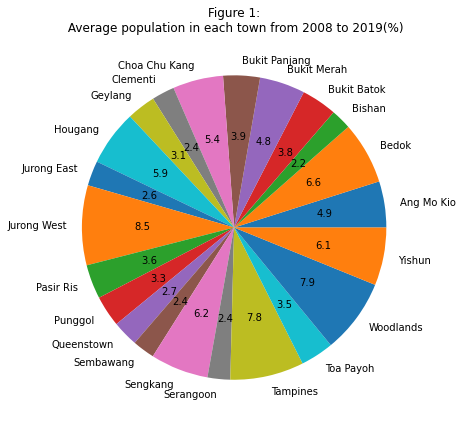

In [85]:

#KIV: ASK PROF, HOW TO SPLIT INTO DIFFERENT YEARS??? (IS THIS ANAYSIS CORRECT)
fig, ax = plt.subplots(1,1,figsize=(40, 7))
dg = dfmerged.groupby('town').mean()

plt.pie(dg['population'], autopct='%.1f', labels=dg.index)

#how to create a legend for pie
plt.title('Figure 1:\n Average population in each town from 2008 to 2019(%)')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figure 1.png')


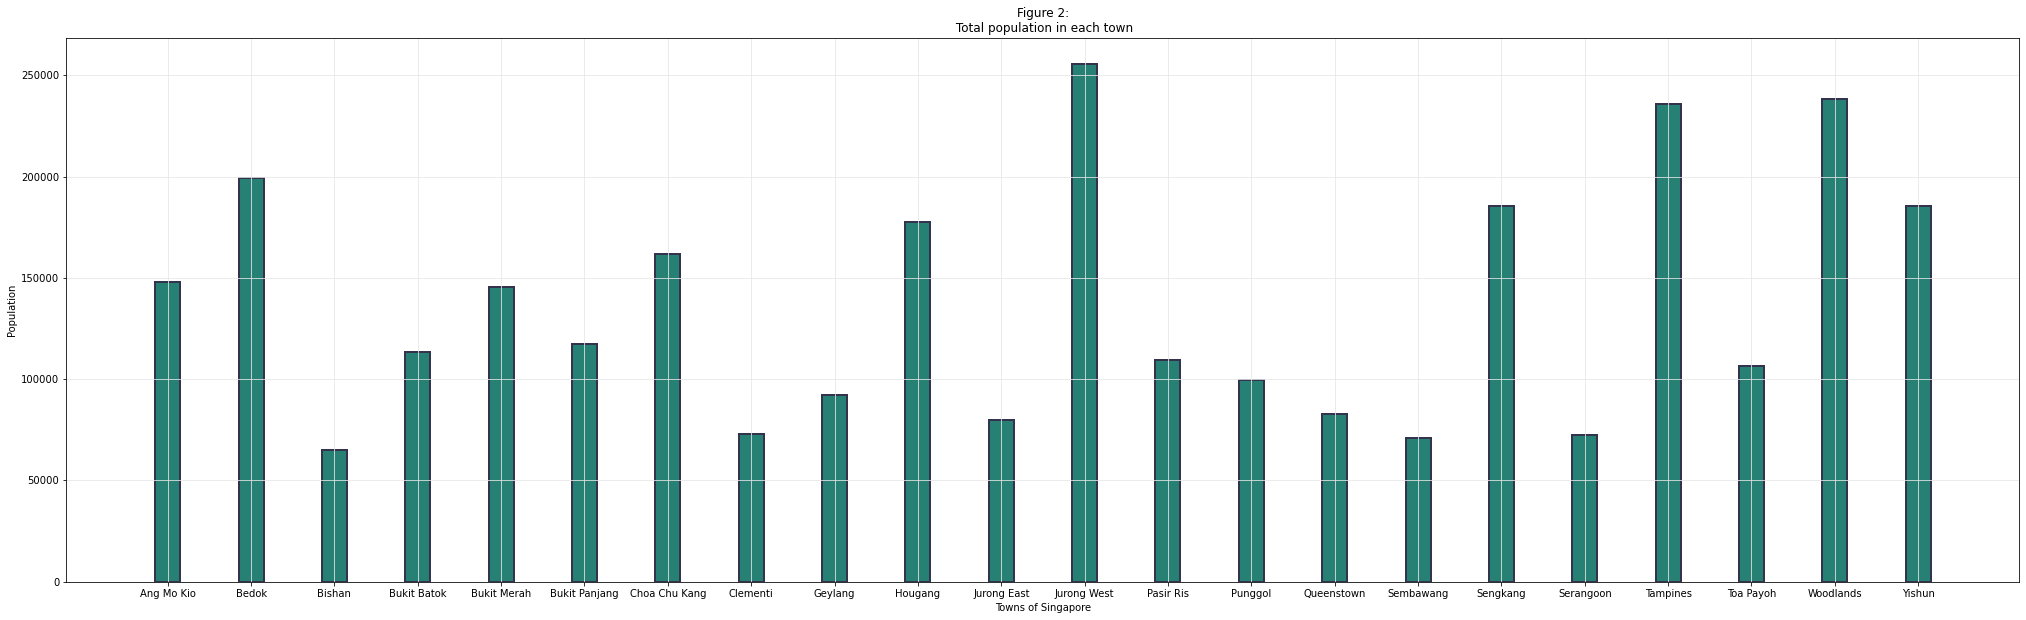

In [90]:
fig, ax = plt.subplots(1,1, figsize=(35, 10))
dh = dfmerged.groupby('town').mean()

plt.bar(dh.index,dh['population'],width=.3,color=(.15,.5,.45),edgecolor=(.2,.2,.3),linewidth=2)

plt.title('Figure 2:\n Total population in each town')
plt.xlabel('Towns of Singapore')
plt.ylabel('Population')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figure 2.png')

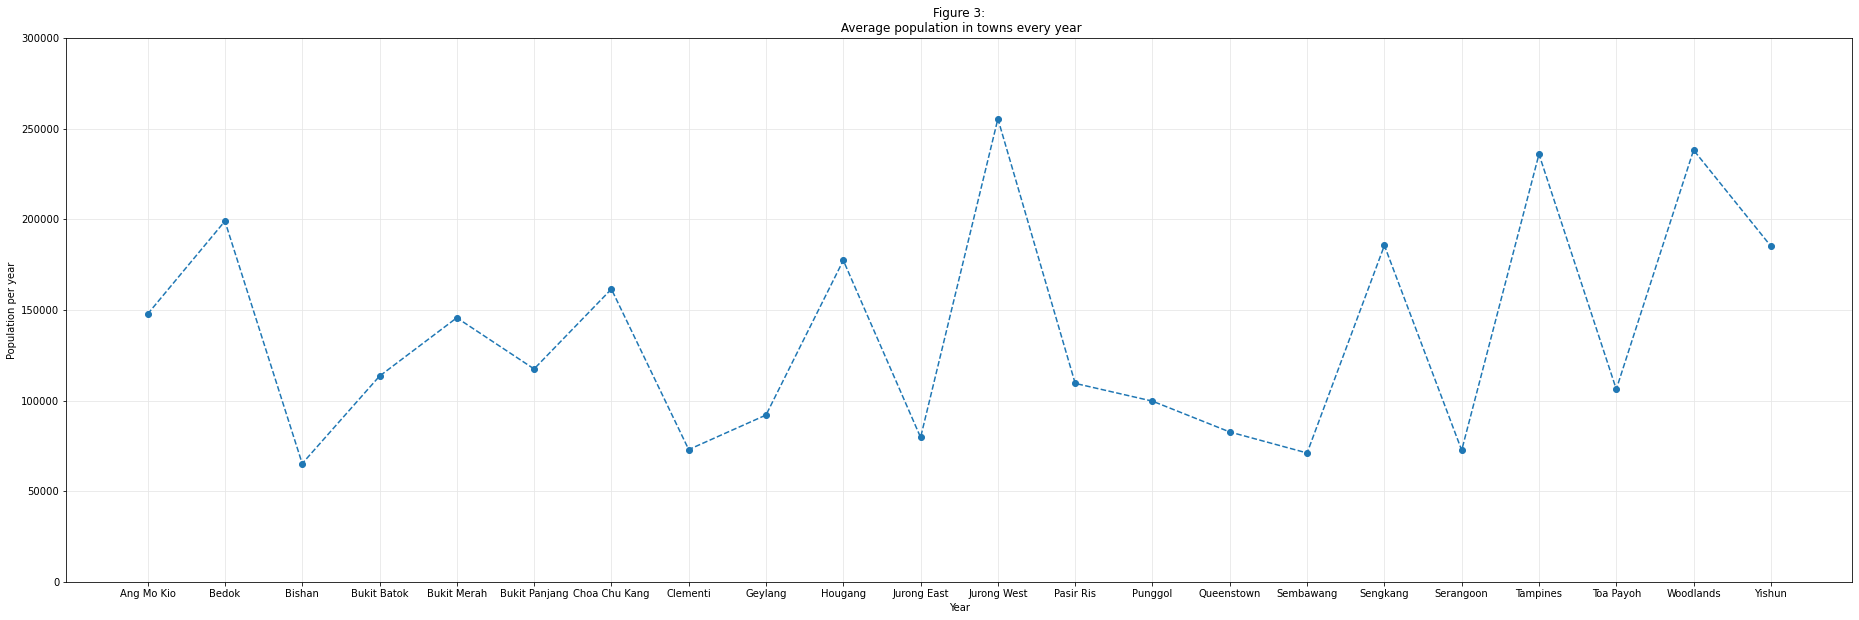

In [92]:
fig, ax = plt.subplots(1,1,figsize=(32, 10))
db = dfmerged.groupby('town').mean()

plt.plot(db.index,db['population'],linestyle='dashed',marker='o',markersize=6)

ax.set_ylim([0, 300000])
plt.title('Figure 3:\n Average population in towns every year')
plt.xlabel('Year')
plt.ylabel('Population per year')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figure 10.png')



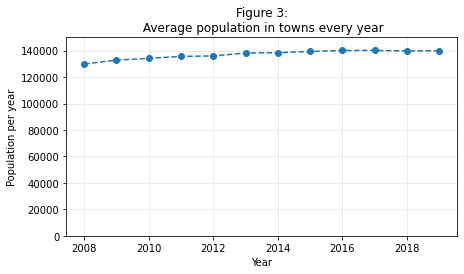

In [17]:
fig, ax = plt.subplots(1,1,figsize=(7,3.65))
di = dfmerged.groupby('financial_year').mean()

plt.plot(di.index,di['population'],linestyle='dashed',marker='o',markersize=6)

ax.set_ylim([0, 150000])
plt.title('Figure 3:\n Average population in towns every year')
plt.xlabel('Year')
plt.ylabel('Population per year')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figure 3.png')

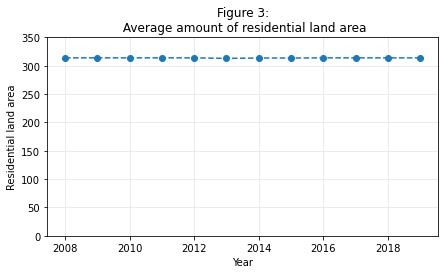

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7,3.65))
dj = dfmerged.groupby('financial_year').mean()

plt.plot(dj.index,dj['residential_land_area'],linestyle='dashed',marker='o',markersize=6)

ax.set_ylim([0, 350.0])
plt.title('Figure 3:\n Average amount of residential land area')
plt.xlabel('Year')
plt.ylabel('Residential land area')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figure 3.png')

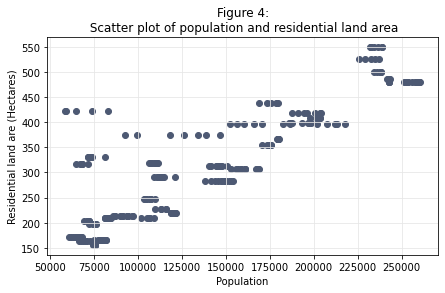

In [97]:
fig, ax = plt.subplots(1,1,figsize=(7,4))

plt.scatter(dfmerged['population'],dfmerged['residential_land_area'],color=(.3,.35,.45))

plt.title('Figure 4:\n Scatter plot of population and residential land area')
plt.xlabel('Population')
plt.ylabel('Residential land are (Hectares)')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figure 4.png')

In [23]:
import numpy as np
import statsmodels.formula.api as smf

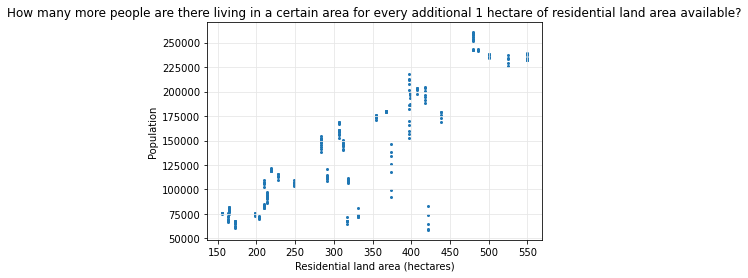

In [99]:
fig, ax = plt.subplots(1,1)
plt.scatter(dfmerged['residential_land_area'],dfmerged['population'],s=4)
plt.title('How many more people are there living in a certain area for every additional 1 hectare of residential land area available?')
plt.xlabel('Residential land area (hectares)')
plt.ylabel('Population')
plt.grid(color=(.9,.9,.9))
plt.show()

In [116]:
reg3 = smf.ols("population ~ residential_land_area", data = dfmerged).fit()
print(reg1.params)

Intercept               -4.857226e-17
residential_land_area    1.593000e-03
dtype: float64


In [117]:
reg3 = smf.ols("np.log(Price) ~ np.log(FloorSqm) + C(Lease) + C(Year)", data = df).fit()
print(reg3.params)

NameError: name 'df' is not defined